In [1]:
!pip install --no-cache-dir zarr==2.14.2 numcodecs==0.11.0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 56.0 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5031 sha256=47732f11a27b32672d2ee228a91d6404615d5dcbbc8e7f6ebd9beaa6954aae70
  Stored in directory: /tmp/pip-ephem-wheel-cache-0zt_y8nn/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1a1ac2d3c885ad6ebd2b4a07
Successfully built asciitree


In [21]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.8 MB/s eta 0:00:00


In [2]:
import fsspec

fs = fsspec.filesystem('gs', token='anon')
fs.ls('gs://gcp-public-data-arco-era5/co/')

['gcp-public-data-arco-era5/co/model-level-moisture.zarr',
 'gcp-public-data-arco-era5/co/model-level-moisture.zarr-v2',
 'gcp-public-data-arco-era5/co/model-level-wind.zarr',
 'gcp-public-data-arco-era5/co/model-level-wind.zarr-v2',
 'gcp-public-data-arco-era5/co/single-level-forecast.zarr',
 'gcp-public-data-arco-era5/co/single-level-forecast.zarr-v2',
 'gcp-public-data-arco-era5/co/single-level-reanalysis.zarr',
 'gcp-public-data-arco-era5/co/single-level-reanalysis.zarr-v2',
 'gcp-public-data-arco-era5/co/single-level-surface.zarr',
 'gcp-public-data-arco-era5/co/single-level-surface.zarr-v2']

In [3]:
import fsspec
import xarray as xr

reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr',
    chunks={'time': 48},storage_options={'token': 'anon'},
    consolidated=True
)
reanalysis

<ipython-input-3-2071a4745a9f>:4: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  reanalysis = xr.open_zarr(


<xarray.Dataset> Size: 31TB
Dimensions:              (time: 374016, values: 542080)
Coordinates:
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...
    latitude             (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude            (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    number               int64 8B ...
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
  * time                 (time) datetime64[ns] 3MB 1979-01-01 ... 2021-08-31T...
    valid_time           (time) datetime64[ns] 3MB dask.array<chunksize=(48,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    d2m                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    hcc                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl1                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl2                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl3                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    ...                   ...
    tsn                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u10                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u100                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v10                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v100                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    z                    (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

In [4]:
print(f'size: {reanalysis.nbytes / (1024 ** 4)} TiB')

size: 28.02835009436967 TiB


In [5]:
reanalysis

<xarray.Dataset> Size: 31TB
Dimensions:              (time: 374016, values: 542080)
Coordinates:
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...
    latitude             (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude            (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    number               int64 8B ...
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
  * time                 (time) datetime64[ns] 3MB 1979-01-01 ... 2021-08-31T...
    valid_time           (time) datetime64[ns] 3MB dask.array<chunksize=(48,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    d2m                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    hcc                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl1                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl2                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl3                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    ...                   ...
    tsn                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u10                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u100                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v10                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v100                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    z                    (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

In [6]:
recent_an = reanalysis.sel(time=slice('2020-01-01', '2021-01-01'))

geopotential_t0 = recent_an.z[0, :]
most_recent_ds = recent_an.isel(time=-1)
new_years_ds = recent_an.sel(time='2020-01-01')

In [7]:

def lon_to_360(dlon: float) -> float:
  return ((360 + (dlon % 360)) % 360)
# First, compute the condition mask
mask = (
    (recent_an.longitude > lon_to_360(-171.79)) &
    (recent_an.longitude < lon_to_360(-66.96)) &
    (recent_an.latitude > 18.91) &
    (recent_an.latitude < 71.35)
).compute()

# Then apply it to the dataset
US_ds = recent_an.where(mask, drop=True)

In [8]:
US_ds

<xarray.Dataset> Size: 66GB
Dimensions:              (time: 8808, values: 49625)
Coordinates:
    depthBelowLandLayer  float64 8B 100.0
    entireAtmosphere     float64 8B 0.0
    latitude             (values) float64 397kB 71.24 71.24 ... 18.97 18.97
    longitude            (values) float64 397kB 188.3 189.2 ... 292.5 292.8
    number               int64 8B 0
    step                 timedelta64[ns] 8B 00:00:00
    surface              float64 8B 0.0
  * time                 (time) datetime64[ns] 70kB 2020-01-01 ... 2021-01-01...
    valid_time           (time) datetime64[ns] 70kB dask.array<chunksize=(24,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    d2m                  (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    hcc                  (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl1                (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl2                (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl3                (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    ...                   ...
    tsn                  (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    u10                  (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    u100                 (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    v10                  (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    v100                 (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
    z                    (time, values) float32 2GB dask.array<chunksize=(24, 49625), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

In [9]:
import xarray as xr
import scipy.spatial
import numpy as np

def mirror_point_at_360(ds):
    # Compute the mask to avoid Dask shape ambiguity
    mask = (ds.longitude == 0).compute()
    extra_point = (
        ds.where(mask, drop=True)
        .assign_coords(longitude=lambda x: x.longitude + 360)
    )
    return xr.concat([ds, extra_point], dim='values')


def build_triangulation(x, y):
  grid = np.stack([x, y], axis=1)
  return scipy.spatial.Delaunay(grid)

def interpolate(data, tri, mesh):
  indices = tri.find_simplex(mesh)
  ndim = tri.transform.shape[-1]
  T_inv = tri.transform[indices, :ndim, :]
  r = tri.transform[indices, ndim, :]
  c = np.einsum('...ij,...j', T_inv, mesh - r)
  c = np.concatenate([c, 1 - c.sum(axis=-1, keepdims=True)], axis=-1)
  result = np.einsum('...i,...i', data[:, tri.simplices[indices]], c)
  return np.where(indices == -1, np.nan, result)

In [10]:
%time ds_feb20 = reanalysis.sel(time=slice('2020-02-01', '2020-02-28')).pipe(mirror_point_at_360)

CPU times: user 809 ms, sys: 338 ms, total: 1.15 s
Wall time: 7.86 s


In [11]:
%time tri = build_triangulation(ds_feb20.longitude, ds_feb20.latitude)

CPU times: user 8.85 s, sys: 589 ms, total: 9.44 s
Wall time: 9.99 s


In [12]:
longitude = np.linspace(0, 360, num=360*4+1)
latitude = np.linspace(-90, 90, num=180*4+1)
mesh = np.stack(np.meshgrid(longitude, latitude, indexing='ij'), axis=-1)
%time d2m_mesh = interpolate(ds_feb20.d2m.values, tri, mesh)
d2m_feb20 = xr.DataArray(d2m_mesh, coords=[('time', ds_feb20.time.data), ('longitude', longitude), ('latitude', latitude)])

CPU times: user 30.9 s, sys: 6.53 s, total: 37.4 s
Wall time: 35.4 s


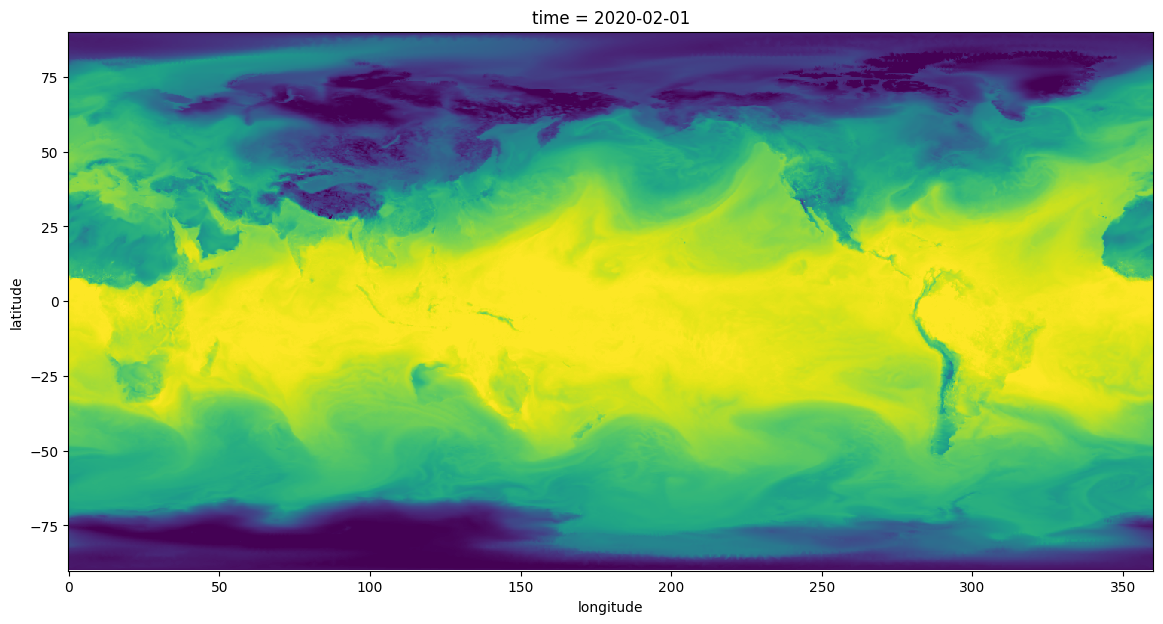

In [13]:
d2m_feb20[0].plot(x='longitude', y='latitude', cmap='viridis', size=7, aspect=2, add_colorbar=False, robust=True)

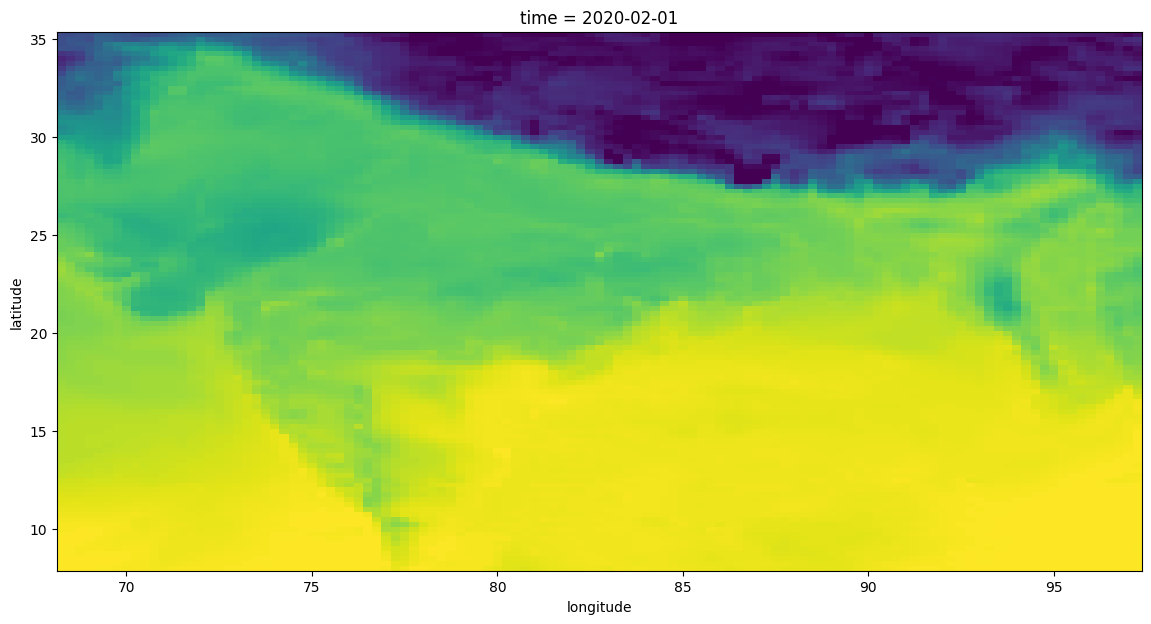

In [14]:
# Zoom into India...
# W: 68.1766451354, S: 7.96553477623, E: 97.4025614766, N: 35.4940095078
(
    d2m_feb20
    .sel(latitude=slice(7.965, 35.494), longitude=slice(lon_to_360(68.176), lon_to_360(97.402)))
    .isel(time=0)
    .plot(x='longitude', y='latitude', cmap='viridis', size=7, aspect=2, add_colorbar=False, robust=True)
)

# Wind data over Texas

In [15]:
u10 = reanalysis['u10']
v10 = reanalysis['v10']

In [16]:
u10

<xarray.DataArray 'u10' (time: 374016, values: 542080)> Size: 811GB
dask.array<open_dataset-u10, shape=(374016, 542080), dtype=float32, chunksize=(48, 542080), chunktype=numpy.ndarray>
Coordinates:
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...
    latitude             (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude            (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    number               int64 8B ...
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
  * time                 (time) datetime64[ns] 3MB 1979-01-01 ... 2021-08-31T...
    valid_time           (time) datetime64[ns] 3MB dask.array<chunksize=(48,), meta=np.ndarray>
Dimensions without coordinates: values
Attributes: (12/25)
    GRIB_N:                                   320
    GRIB_NV:                                  0
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           u10
    GRIB_dataType:                            an
    GRIB_gridDefinitionDescription:           Gaussian Latitude/Longitude Grid
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_typeOfLevel:                         surface
    GRIB_units:                               m s**-1
    long_name:                                10 metre U wind component
    standard_name:                            unknown
    units:                                    m s**-1

In [17]:
print(reanalysis.coords)

Coordinates:
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...
    latitude             (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude            (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    number               int64 8B ...
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
  * time                 (time) datetime64[ns] 3MB 1979-01-01 ... 2021-08-31T...
    valid_time           (time) datetime64[ns] 3MB dask.array<chunksize=(48,), meta=np.ndarray>


In [18]:
lon_west = lon_to_360(-106.65)
lon_east = lon_to_360(-93.51)
lat_south = 25.84
lat_north = 36.50

# Compute the mask explicitly
mask = (
    (reanalysis.longitude >= lon_west) & (reanalysis.longitude <= lon_east) &
    (reanalysis.latitude >= lat_south) & (reanalysis.latitude <= lat_north)
).compute()

# Apply the mask to subset and drop unneeded values
texas_ds = reanalysis[['u10', 'v10']].where(mask, drop=True)

In [26]:
import numpy as np
import xarray as xr
import scipy.spatial
from tqdm import tqdm
import pandas as pd

# ----------- Helper Functions -----------
def lon_to_360(dlon):
    return ((360 + (dlon % 360)) % 360)

def interpolate_time_series(var, tri, mesh, lon_new, lat_new):
    time_len = var.shape[0]
    result = np.empty((time_len, len(lon_new), len(lat_new)))

    for t in range(time_len):
        values = var.isel(time=t).values.ravel()
        indices = tri.find_simplex(mesh)
        T_inv = tri.transform[indices, :2, :]
        r = tri.transform[indices, 2, :]
        c = np.einsum('...ij,...j', T_inv, mesh - r)
        c = np.concatenate([c, 1 - c.sum(axis=-1, keepdims=True)], axis=-1)
        interp_vals = np.einsum('...i,...i', values[tri.simplices[indices]], c)
        interp_vals[indices == -1] = np.nan
        result[t] = interp_vals.reshape(len(lon_new), len(lat_new))

    return result

# ----------- Define US Grid and Subset -----------
lon_west = lon_to_360(-125.0)
lon_east = lon_to_360(-66.5)
lat_south = 24.5
lat_north = 49.5

mask = (
    (reanalysis.longitude >= lon_west) & (reanalysis.longitude <= lon_east) &
    (reanalysis.latitude >= lat_south) & (reanalysis.latitude <= lat_north)
).compute()

texas_ds = reanalysis[['u10', 'v10']].where(mask, drop=True)

# Grid for interpolation
lon_new = np.arange(lon_west, lon_east + 0.25, 0.25)
lat_new = np.arange(lat_south, lat_north + 0.25, 0.25)
lon_grid, lat_grid = np.meshgrid(lon_new, lat_new, indexing='ij')
mesh = np.stack([lon_grid.ravel(), lat_grid.ravel()], axis=-1)

# Triangulation (once)
lon = texas_ds.longitude.values.ravel()
lat = texas_ds.latitude.values.ravel()
tri = scipy.spatial.Delaunay(np.stack([lon, lat], axis=1))

# ----------- Loop over years and days -----------
for year in range(2015, 2022):
    print(f"\n🔄 Processing year: {year}")
    year_ds = texas_ds.sel(time=slice(f"{year}-01-01", f"{year}-12-31"))

    if year_ds.time.size == 0:
        print(f"⚠️ No data found for {year}, skipping.")
        continue

    # Get unique days
    dates = pd.to_datetime(year_ds.time.values).normalize()
    unique_days = sorted(set(dates))

    for day in tqdm(unique_days, desc=f"📅 Saving daily files for {year}"):
        day_str = str(day.date())
        day_ds = year_ds.sel(time=day_str)

        if day_ds.time.size == 0:
            continue

        # Interpolate
        u10_interp = interpolate_time_series(day_ds.u10, tri, mesh, lon_new, lat_new)
        v10_interp = interpolate_time_series(day_ds.v10, tri, mesh, lon_new, lat_new)

        # Create DataArrays
        times = day_ds.time.values
        u10_da = xr.DataArray(u10_interp, coords=[('time', times), ('longitude', lon_new), ('latitude', lat_new)])
        v10_da = xr.DataArray(v10_interp, coords=[('time', times), ('longitude', lon_new), ('latitude', lat_new)])

        # Combine and save
        daily_wind = xr.Dataset({'u10': u10_da, 'v10': v10_da})
        daily_wind = daily_wind.transpose('time', 'latitude', 'longitude')
        encoding = {var: {"zlib": True, "complevel": 4} for var in daily_wind.data_vars}
        daily_wind.to_netcdf(f"texas_wind_{day_str}.nc", encoding=encoding)



🔄 Processing year: 2015


📅 Saving daily files for 2015:   4%|▍         | 14/365 [08:56<3:44:03, 38.30s/it]


KeyboardInterrupt: 

In [29]:
ds = xr.open_dataset('texas_wind_2015-01-01.nc')
ds = ds.transpose('time', 'latitude', 'longitude')
ds

<xarray.Dataset> Size: 9MB
Dimensions:    (time: 24, longitude: 235, latitude: 101)
Coordinates:
  * time       (time) datetime64[ns] 192B 2015-01-01 ... 2015-01-01T23:00:00
  * longitude  (longitude) float64 2kB 235.0 235.2 235.5 ... 293.0 293.2 293.5
  * latitude   (latitude) float64 808B 24.5 24.75 25.0 25.25 ... 49.0 49.25 49.5
Data variables:
    u10        (time, latitude, longitude) float64 5MB ...
    v10        (time, latitude, longitude) float64 5MB ...

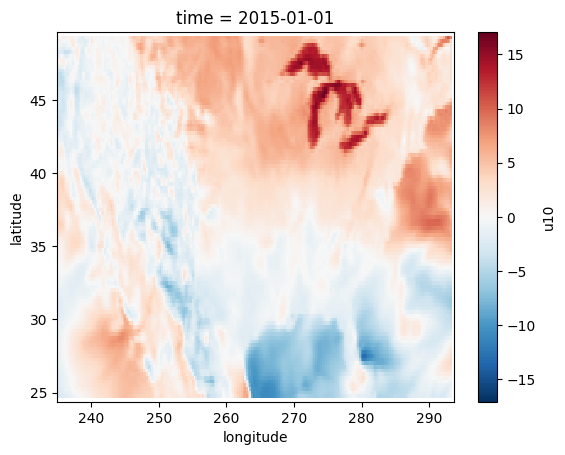

In [30]:
ds.u10.isel(time=0).plot()